 # Лабораторная работа №3: Классификация $kNN$



 Вечканова П.А., группа 6133-010402


## Задание:

1. Считать в `pandas.dfFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

2. Бинарная классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).
   - Осуществить бинарную классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить метрики на данных без нормализации и с применением нормализации.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
   - Осуществить бинарную классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

3. Многоклассовая классификация:
   - Привести описание датасета.
   - Осуществить предобработку данных - "подчистить данные".
   - Закодировать категориальные признаки при необходимости.
   - Нормализовать данные.
   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.
   - Разбить выборку на обучающую и тестовую.
   - Осуществить многоклассовую классификацию.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.
   - Осуществить многоклассовую классификацию с отфильтрованными признаками.
   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.
   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.
   - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.
   - Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

### 1. Считать в `pandas.dfFrame` любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [122]:
import pandas as pd

df = pd.read_csv("/content/Star3642_balanced.csv")

df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


### 2. Бинарная классификация:

#### - Привести описание датасета.

Датасет содержит признаки:

| Признак     | Описание                                                                 |
|-------------|--------------------------------------------------------------------------|
| Vmag        | Видимая звёздная величина (чем меньше значение, тем ярче звезда)          |
| Plx         | Параллакс звезды (используется для расчёта расстояния до звезды в парсеках) |
| e_Plx       | Стандартная ошибка параллакса (рекомендуется удалить строки с высокой погрешностью) |
| B-V         | Цветовой индекс B-V (0 или отрицательный — горячие звёзды, 2.0 — холодные) |
| SpType      | Спектральный класс звезды (например, K3III, B1II, G3III и т.д.)           |
| Amag        | Абсолютная звёздная величина (яркость звезды на стандартном расстоянии 10 пк) |
| TargetClass | Класс звезды: 0 — карлик, 1 — гигант                                      |

#### - Осуществить предобработку данных (избавиться от `null`, убрать некоторые признаки и т.п.) - "подчистить данные".

In [123]:
df = df.dropna()

####    - Закодировать категориальные признаки при необходимости.


In [124]:
df = pd.get_dummies(df, columns=["SpType"], drop_first=True)

####   - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.



####    - Разбить выборку на обучающую и тестовую.

In [125]:
from sklearn.model_selection import train_test_split

X = df.drop("TargetClass", axis=1)
y = df["TargetClass"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####    - Осуществить бинарную классификацию.


In [126]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

####   - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [127]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("Метрики без нормализации:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Метрики без нормализации:
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-score: 0.90
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       353
           1       0.91      0.90      0.90       376

    accuracy                           0.90       729
   macro avg       0.90      0.90      0.90       729
weighted avg       0.90      0.90      0.90       729



####    - Нормализовать данные (`StandardScaler`или `MinMaxScaler`).


In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####    - Осуществить бинарную классификацию.

In [129]:
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

#### - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.

In [130]:
print("\nМетрики с нормализацией:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_scaled):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_scaled):.2f}")
print(f"F1-score: {f1_score(y_test, y_pred_scaled):.2f}")
print(classification_report(y_test, y_pred_scaled))


Метрики с нормализацией:
Accuracy: 0.91
Precision: 1.00
Recall: 0.84
F1-score: 0.91
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       353
           1       1.00      0.84      0.91       376

    accuracy                           0.91       729
   macro avg       0.92      0.92      0.91       729
weighted avg       0.93      0.91      0.91       729



####    - Сравнить метрики на данных без нормализации и с применением нормализации.

Вывод: Нормализация не улучшила общую точность, но изменила баланс между Precision и Recall.

  #### - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.

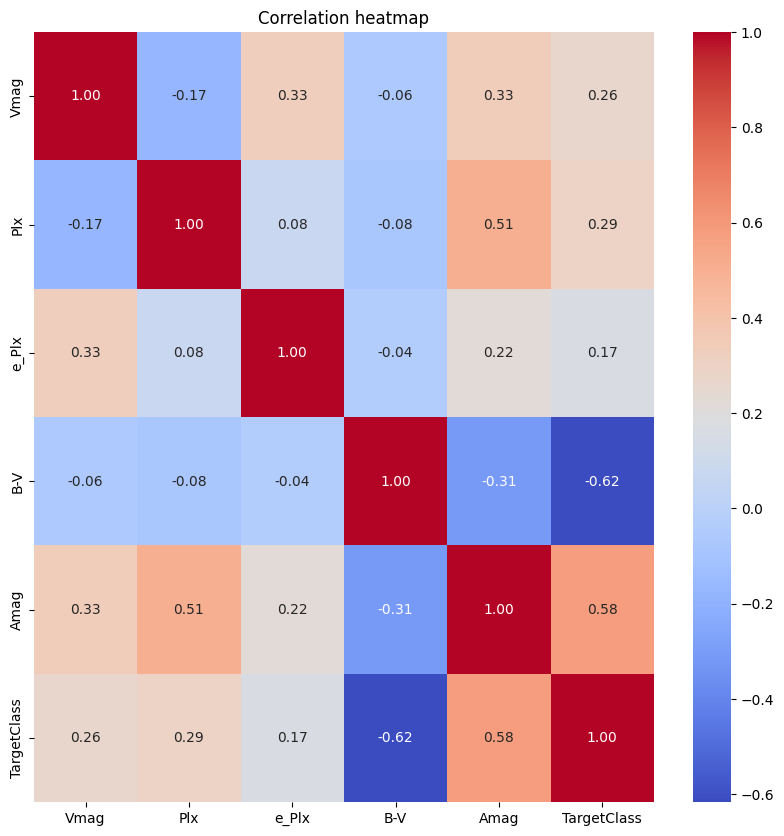

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation heatmap')
plt.show()

 #### - Осуществить бинарную классификацию с отфильтрованными признаками.


In [132]:
df = df.drop("e_Plx", axis=1)

X_filtered = df.drop("TargetClass", axis=1)

In [133]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

In [145]:
knn_filtered = KNeighborsClassifier(n_neighbors=3)
knn_filtered.fit(X_train_f, y_train_f)
y_pred_filtered = knn_filtered.predict(X_test_f)

 ####  - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.


In [146]:
print("\nМетрики после отбора признаков:")
print(f"Accuracy: {accuracy_score(y_test_f, y_pred_filtered):.2f}")
print(f"Precision: {precision_score(y_test_f, y_pred_filtered):.2f}")
print(f"Recall: {recall_score(y_test_f, y_pred_filtered):.2f}")
print(f"F1-score: {f1_score(y_test_f, y_pred_filtered):.2f}")
print(classification_report(y_test_f, y_pred_filtered))


Метрики после отбора признаков:
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1-score: 0.92
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       353
           1       0.92      0.91      0.92       376

    accuracy                           0.91       729
   macro avg       0.91      0.91      0.91       729
weighted avg       0.91      0.91      0.91       729



####   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.


Убрав не релевантные признаки, метрики $accuracy$ и $precision$ улучшились

####    - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.

In [144]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": np.arange(1, 10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X, y)
print(f"\nЛучшее k: {grid.best_params_['n_neighbors']}")


Лучшее k: 1


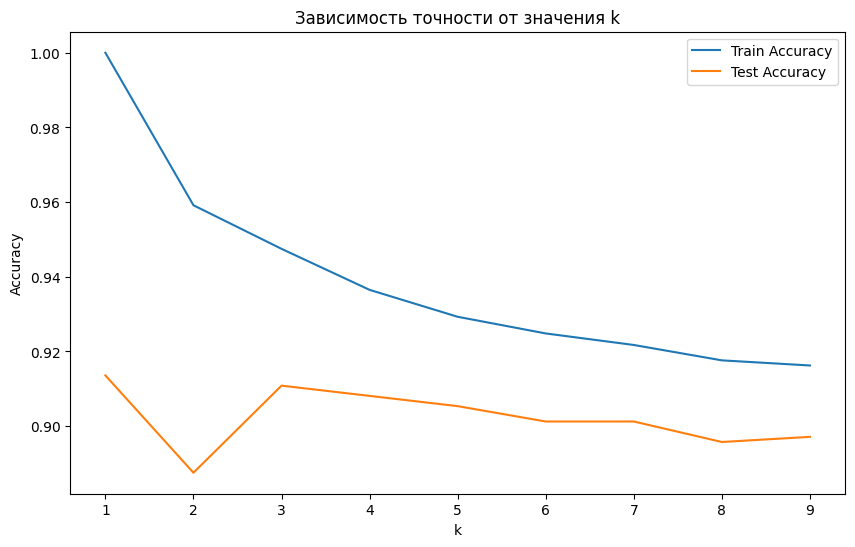

In [140]:
train_acc = []
test_acc = []
k_values = range(1, 10)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_f, y_train_f)
    train_acc.append(knn.score(X_train_f, y_train_f))
    test_acc.append(knn.score(X_test_f, y_test_f))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, label="Train Accuracy")
plt.plot(k_values, test_acc, label="Test Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Зависимость точности от значения k")
plt.show()

### Многоклассовая классификация:


In [151]:
import pandas as pd

df = pd.read_csv("/content/6 class csv.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


 ####  - Привести описание датасета.

Датасет содержит данные для классификации звезд по HR-диаграмме. Основные признаки:

| Признак                 | Описание                          | Единицы измерения    |
|-------------------------|-----------------------------------|----------------------|
| Temperature (K)         | Абсолютная температура           | Кельвины (K)         |
| Luminosity(L/Lo)        | Относительная светимость         | L/Lo (отн. Солнца)   |
| Radius(R/Ro)            | Относительный радиус             | R/Ro (отн. Солнца)   |
| Absolute magnitude(Mv)  | Абсолютная звездная величина      | Mv                   |
| Star type               | Тип звезды                        | Категория (0-5)      |
| Star color              | Цвет звезды                       | Категория            |
| Spectral Class          | Спектральный класс               | Категория (OBAFGKM)  |

 ####  - Осуществить предобработку данных - "подчистить данные".


In [152]:
df = df.drop(['Spectral Class'], axis=1)

####   - Закодировать категориальные признаки при необходимости.


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Star type'] = le.fit_transform(df['Star type'])
df['Star color'] = le.fit_transform(df['Star color'])

####   - Нормализовать данные.


In [155]:
X = df.drop('Star type', axis=1)
y = df['Star type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####    - Выбрать какое-нибудь значение гиперпараметра $k$ алгоритма $kNN$.


In [ ]:
k=2

####    - Разбить выборку на обучающую и тестовую.


In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

####    - Осуществить многоклассовую классификацию.


In [157]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

####    - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.


In [158]:
print("\nМетрики классификации:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.2f}")
print(f"F1-score (macro): {f1_score(y_test, y_pred, average='macro'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Метрики классификации:
Accuracy: 0.98
Precision (macro): 0.98
Recall (macro): 0.98
F1-score (macro): 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      1.00      0.93         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



####    - Построить `сorrelation heatmap` и/или воспользоваться методом `corr()`. Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.


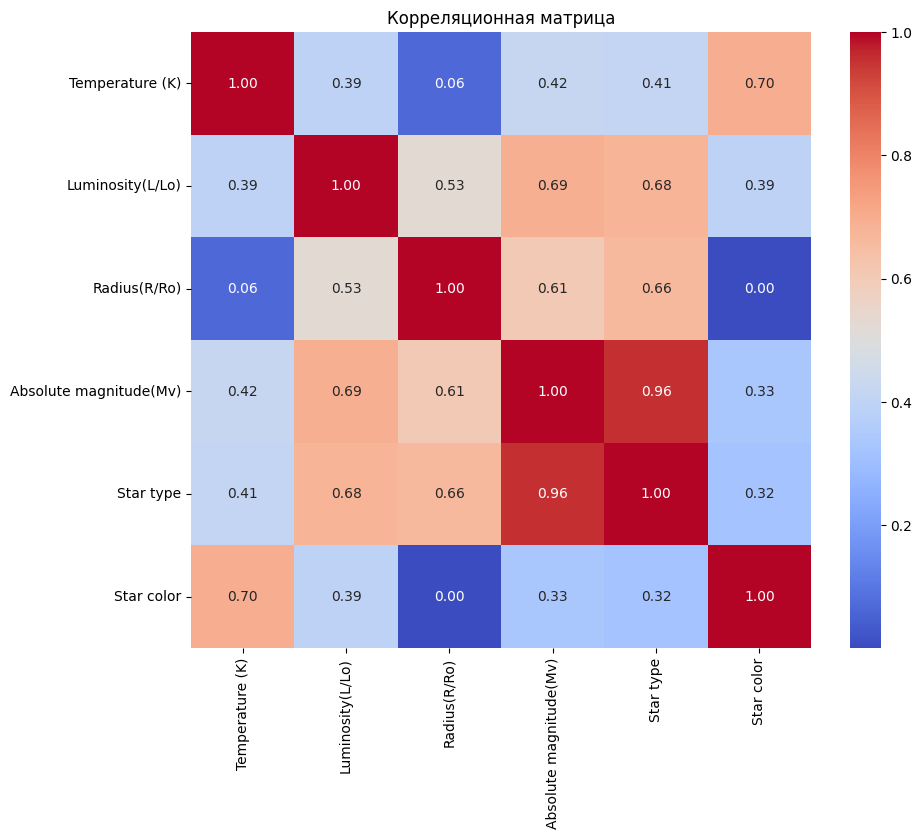

In [201]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

corr_matrix = df.corr().abs()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [222]:
target_corr = corr_matrix['Star type'].abs()
selected_features = target_corr[target_corr > 0.4].index.tolist()
selected_features.remove('Star type')

X_filtered = X[selected_features]

X_filtered_scaled = scaler.fit_transform(X_filtered)

#### - Осуществить многоклассовую классификацию с отфильтрованными признаками.

In [223]:
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
    X_filtered_scaled, y, test_size=0.2, random_state=42
)

knn_filtered = KNeighborsClassifier(n_neighbors=5)
knn_filtered.fit(X_train_filt, y_train_filt)
y_pred_filt = knn_filtered.predict(X_test_filt)

####    - Посчитать метрики: $accuracy$, $precision$, $recall$, $\textit{f-measure}$, а также составить `classification_report`.


In [224]:
accuracy_filt = accuracy_score(y_test_filt, y_pred_filt)
precision_filt = precision_score(y_test_filt, y_pred_filt, average='macro')
recall_filt = recall_score(y_test_filt, y_pred_filt, average='macro')
f1_filt = f1_score(y_test_filt, y_pred_filt, average='macro')

print("\nМодель с отфильтрованными признаками:")
print(f"Accuracy: {accuracy_filt:.2f}")
print(f"Precision: {precision_filt:.2f}")
print(f"Recall: {recall_filt:.2f}")
print(f"F1-score: {f1_filt:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_filt, y_pred_filt))


Модель с отфильтрованными признаками:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      0.88      0.93         8
           4       0.89      1.00      0.94         8
           5       1.00      1.00      1.00        11

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



####   - Сравнить результаты "до" и "после" фильтрации, сделать выводы.


Фильтрация признаков не повлияла на общее качество модели, но улучшила разделение между отдельными классами.

####    - Перебрать значения гиперпараметра $k$ в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график *train/test accuracy* в зависимости от значения $k$.


In [226]:
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_filtered_scaled, y)
best_k = grid.best_params_['n_neighbors']
print(f"\nЛучшее значение k: {best_k}")


Лучшее значение k: 3


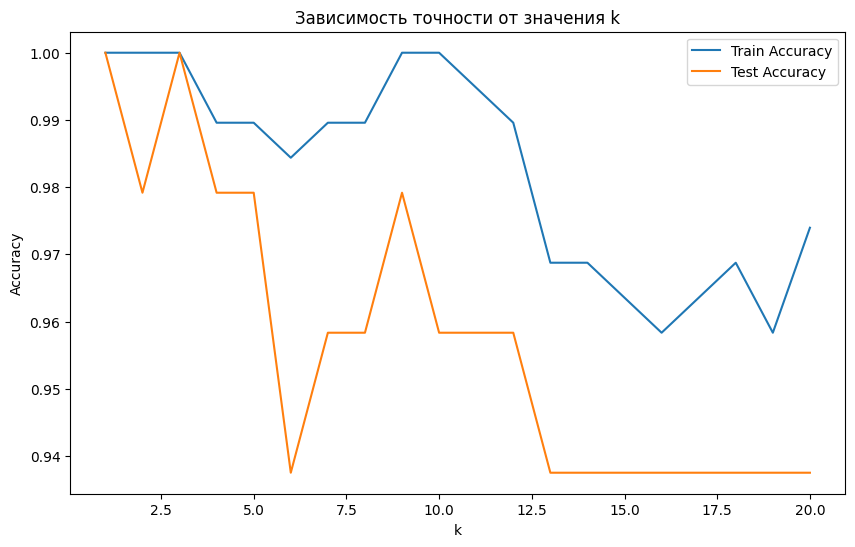

In [227]:
train_acc = []
test_acc = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_filt, y_train_filt)
    train_acc.append(knn.score(X_train_filt, y_train_filt))
    test_acc.append(knn.score(X_test_filt, y_test_filt))

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, label='Train Accuracy')
plt.plot(k_values, test_acc, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Зависимость точности от значения k')
plt.show()


####    - Для лучшего классификатора привести метрики, `classification_report`, построить [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) (это вроде матрицы $TN$ / $TP$ / $FN$ / $FP$, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).


Метрики лучшего классификатора:
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        11

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



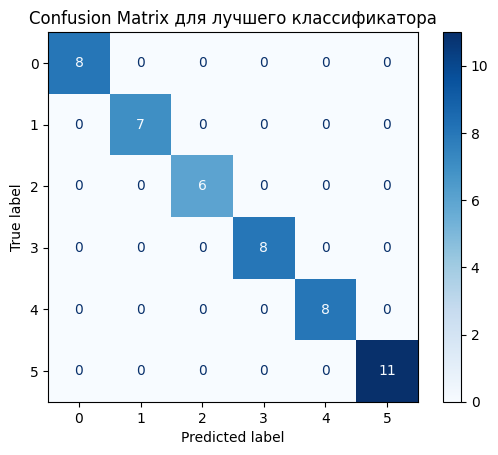

In [228]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_filt, y_train_filt)
y_pred_best = best_knn.predict(X_test_filt)

print("\nМетрики лучшего классификатора:")
print(f"Accuracy: {accuracy_score(y_test_filt, y_pred_best):.2f}")
print(classification_report(y_test_filt, y_pred_best))

cm = confusion_matrix(y_test_filt, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix для лучшего классификатора')
plt.show()